In [276]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [363]:

name = "Ryan Doiron"

show_eda = False

In [3]:

df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
178,1,0.414,0.934,0.677,0.476,0.187,0.167,0.571,0.260,0.681,...,0.311,0.917,0.580,0.589,0.256,0.107,0.178,0.533,0.455,0.669
213,1,0.698,0.456,0.489,0.410,0.771,0.750,0.317,0.043,0.775,...,0.914,0.829,0.176,0.300,0.123,0.003,0.506,0.011,0.139,0.758
197,0,0.748,0.018,0.670,0.265,0.011,0.616,0.961,0.384,0.930,...,0.601,0.291,0.219,0.880,0.252,0.016,0.271,0.301,0.512,0.914
205,1,0.648,0.961,0.907,0.355,0.340,0.837,0.677,0.098,0.199,...,0.875,0.210,0.248,0.439,0.640,0.651,0.962,0.435,0.489,0.845
116,0,0.815,0.797,0.886,0.453,0.434,0.883,0.050,0.946,0.254,...,0.256,0.174,0.537,0.535,0.965,0.339,0.414,0.032,0.334,0.902


### Starting


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 201 entries, target to var_200
dtypes: float64(200), int64(1)
memory usage: 392.7 KB


In [9]:
df.describe()

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.524000,0.515564,0.499984,0.491172,0.533664,0.493556,0.493308,0.503380,0.490580,0.508116,...,0.494188,0.483484,0.489176,0.476996,0.506612,0.487852,0.485272,0.499436,0.484928,0.494028
std,0.500426,0.295878,0.303769,0.288538,0.284235,0.290833,0.294168,0.279257,0.290459,0.295278,...,0.293931,0.282872,0.285203,0.289716,0.292900,0.280595,0.286139,0.300880,0.281306,0.300464
min,0.000000,0.004000,0.005000,0.007000,0.002000,0.008000,0.003000,0.003000,0.006000,0.001000,...,0.007000,0.003000,0.003000,0.005000,0.003000,0.003000,0.013000,0.002000,0.003000,0.003000
25%,0.000000,0.244000,0.234250,0.260000,0.291750,0.225750,0.224500,0.282250,0.251750,0.232000,...,0.224250,0.253250,0.219250,0.213000,0.249000,0.260750,0.238000,0.240250,0.245500,0.229000
50%,1.000000,0.544000,0.497500,0.465500,0.516500,0.487500,0.511500,0.524000,0.479500,0.509000,...,0.481500,0.460500,0.493000,0.482500,0.511500,0.474500,0.479500,0.484000,0.507500,0.491000
75%,1.000000,0.755500,0.761250,0.725000,0.785000,0.747750,0.746250,0.718500,0.736500,0.762000,...,0.760000,0.717250,0.744750,0.725750,0.759750,0.727750,0.747750,0.777250,0.705000,0.760250
max,1.000000,0.989000,0.999000,0.996000,0.997000,0.992000,0.991000,0.988000,0.999000,0.998000,...,0.998000,1.000000,0.980000,0.989000,0.998000,0.988000,1.000000,1.000000,0.999000,0.998000


In [15]:
print((df.isnull().sum()).sum()) 
# Check to see the number of columns returning true for .isnull() 

0


In [16]:
# All of the columns are showing up as float's, and none of them are showing any missing values. 

y = np.array(df['target']).reshape(-1,1)
x = np.array(df.drop(columns={'target'}))

print(df.shape, y.shape, x.shape)

# Seperated the data into dependant and independant arrays. 
# There's no need to create lists for categorical and numeric values since the entire set is numeric. 
# The data is also already scaled to all be within the 0-1 range. 

(250, 201) (250, 1) (250, 200)


#### Modelling


In [353]:

def model_building(x_train,y_train):

    para = {'max_depth':[3,4,5,6,7,8],
        'min_samples_leaf':[2,3,4,5,6,7,8]
        }

    cv = GridSearchCV(estimator=DecisionTreeClassifier(),
            param_grid=para, 
            cv=10
            )
    
    cv.fit(x_train, y_train)
    cv_data = cv.best_estimator_
    
    depth = cv_data.get_params()['max_depth']
    leaves = cv_data.get_params()['min_samples_leaf']
    
    pipe_steps = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('DT', DecisionTreeClassifier(
        max_depth=depth, 
        min_samples_leaf=leaves,
        criterion='entropy'
        ))
    ]

    pipe = Pipeline(pipe_steps)

    best = pipe.fit(x_train, y_train)   

    return best

# I'm not sure if using a function for part of this goes against the spirit of the assignment
# However, I could not figure out how to get the changing variable to work within a pipeline with what we've gone over in class. 


0.62


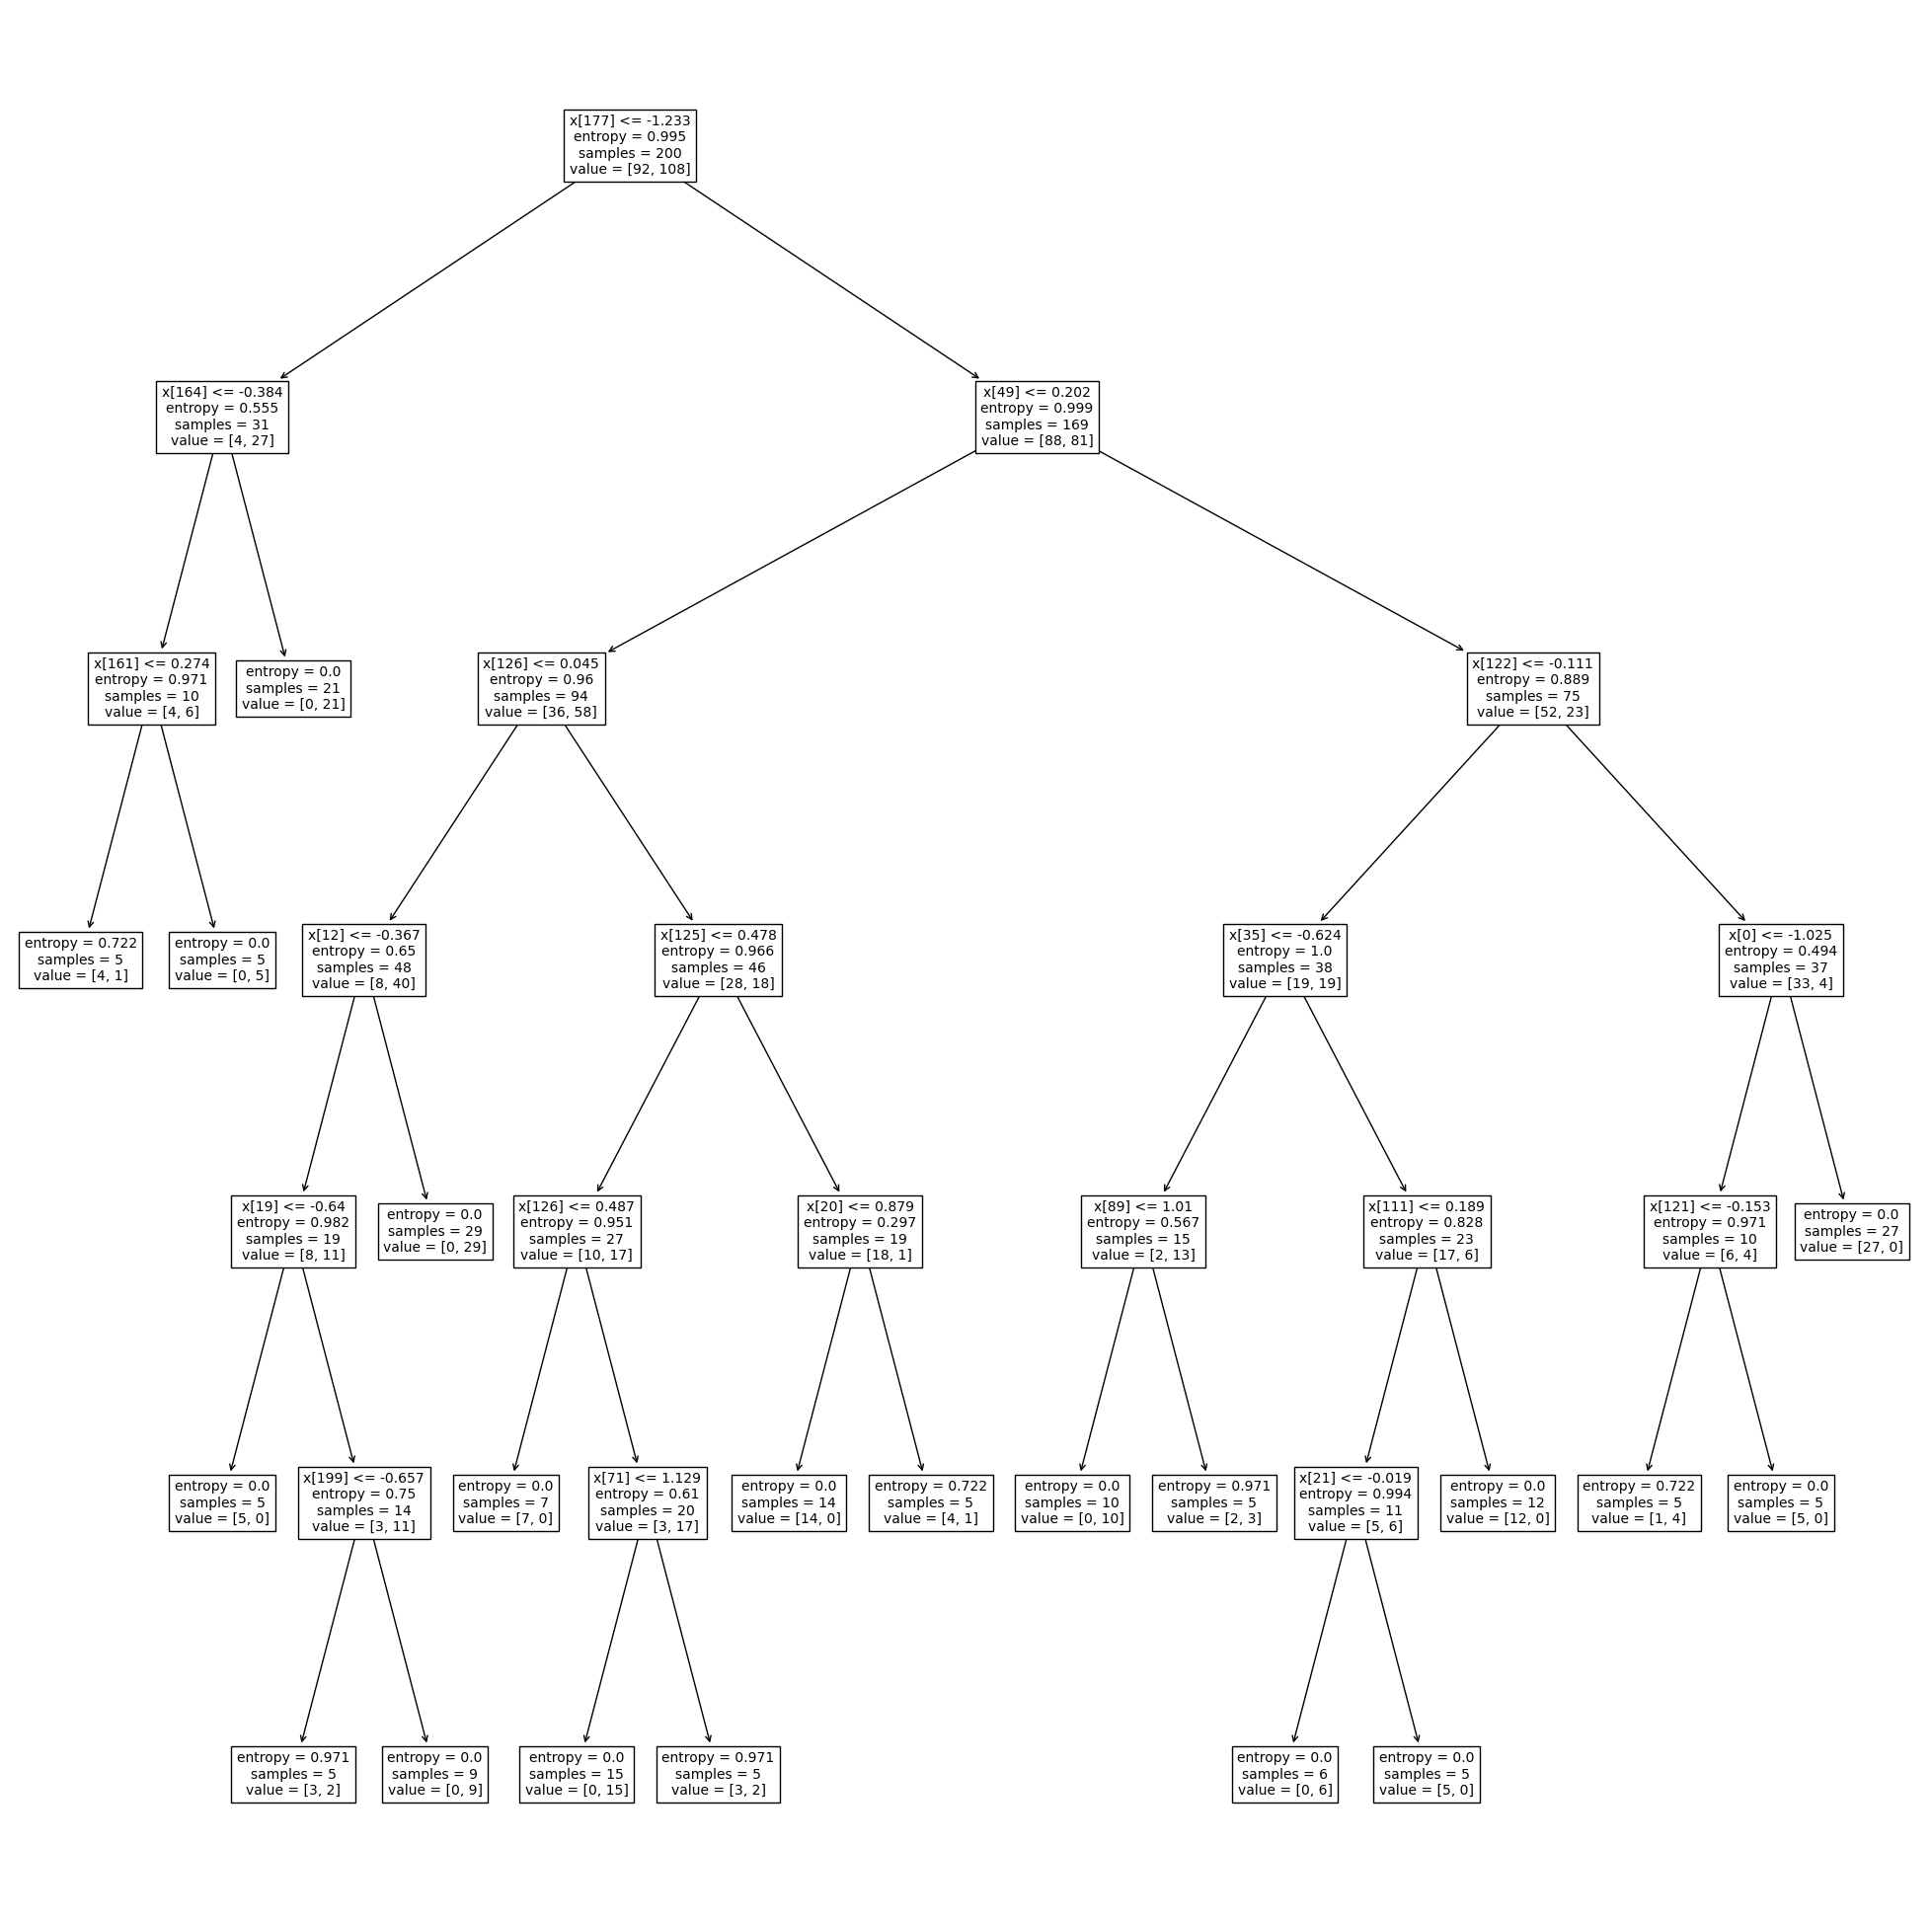

In [360]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

best = model_building(x_train, y_train)

plot_size = 25
font_size = 10


plt.figure(figsize=(plot_size,plot_size))
plot_tree(best['DT'], fontsize=font_size)

print(best.score(x_test, y_test))

### Finishing


In [361]:
print(best.score(x_test, y_test))
print(best)

0.62
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        min_samples_leaf=5))])


### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [364]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))


0.5248606081216523
0.5249113924050632
Ryan Doiron 0.5248860002633577


### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<ul> 
<li> I used a grid search to establish the hyper parameters from a couple chosen at random. 
<li>The model seems to not be overfitting, with none of the leaves ending up with single values, and some impurity in the final output. However, the accuracy is lower than what I would like and I'm unsure how to increase it from this point. It's reliably performing better than chance, but not by a large margin. 
<li> I'm not sure if we were supposed to do anything else for preprocessing. I know how to do do imputation, feature scaling, and handle categorical data a column transformer. But none of these felt applicable to the data set as it was already all numerical and scaled. 
</ul>